# Week 6 - Quadratic Programming

## Problem 1 - Inequality Constrained Quadratic Programming
Consider the QP in Example 16.4 (p.475) in Nocedal and Wright. 

\begin{aligned}
\min _x q(x)=\left(x_1-1\right)^2+\left(x_2-2.5\right)^2 & \\
\text { subject to } \quad x_1-2 x_2+2 & \geq 0, \\
-x_1-2 x_2+6 & \geq 0, \\
-x_1+2 x_2+2 & \geq 0, \\
x_1 & \geq 0, \\
x_2 & \geq 0 .
\end{aligned}

This is an example of a convex QP in the form
\begin{align*}
\begin{array}{ll}
\min _{x \in \mathbb{R}^n} & f(x)=\frac{1}{2} x^{\prime} H x+g^{\prime} x \\
\text { s.t. } & c_i(x)=a_i^{\prime} x+b_i \geq 0 \quad i \in \mathcal{I}
\end{array}
\end{align*}

### 1.1 - Contour Plot

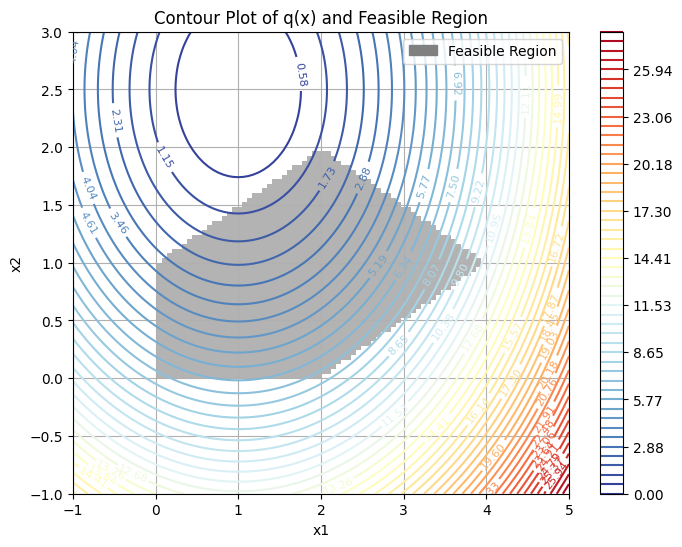

In [1]:
import numpy as np
from copti.plot.contour import plot_2d_constrained

# Define the q function and constrains variable
def q(x):
    return (x[0] - 1) ** 2 + (x[1] - 2.5) ** 2

constrains = [
    lambda x: x[0] - 2 * x[1] + 2,
    lambda x: -x[0] - 2 * x[1] + 6,
    lambda x: -x[0] + 2 * x[1] + 2,
    lambda x: x[0],
    lambda x: x[1]
]

# Define the range of x values to consider
x_range = np.linspace(-1, 5, 100)
y_range = np.linspace(-1, 3, 100)

# Call the plot_2d function
plot_2d_constrained(q, x_range, y_range, constrains)


### 1.2 - Primal Active-Set QP Algorithm
Implement a primal active-set QP algorithm and illustrate its iterations in the contour plot for a feasible starting point

See `src/copti/quad/active_set.py:primal_active_set`

In [2]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

q = (x1 - 1) ** 2 + (x2 - 2.5) ** 2

grad_q = [sp.diff(q, x1), sp.diff(q, x2)]
hess_q = [
    [sp.diff(grad_q[0], x1), sp.diff(grad_q[0], x2)],
    [sp.diff(grad_q[1], x1), sp.diff(grad_q[1], x2)]
]

print(grad_q)
print(hess_q)

[2*x1 - 2, 2.0*x2 - 5.0]
[[2, 0], [0, 2.00000000000000]]


In [4]:
import numpy as np
from copti.quad import active_set as acts

g = np.array([2, 2])
H = np.array([[2, 0], [0, 2]])
A = np.array([[1, -2], [-1, -2], [-1, 2], [1, 0], [0, 1]])
b = np.array([-2, -6, -2, 0, 0])

x0 = np.array([1., 1.]) 

x, mu = acts.primal_active_set(H, g, A, b, x0)
print(f"x: {x}, mu: {mu}")